<a href="https://colab.research.google.com/github/linis7/EDA-Hotel_booking_Analysis/blob/main/HotelBookingAnalysisEDA(Lini_Saxena%2C_Cohort_Hudson).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b> This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.

## <b> Explore and analyze the data to discover important factors that govern the bookings.





#### <b> Importing Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### <b> Mounting Drive & Importing Dataset Of Hotel Booking Analysis from Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_hba=pd.read_csv('/content/drive/MyDrive/EDA Capstone Project/Hotel Bookings.csv')

#### <b>  Data Exploration

In [4]:
# let's analyze at the first five rows of dataset.
df_hba.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# let's analyze last five rows of dataset.
df_hba.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [5]:
# Let's find out the shape of our dataset.
df_hba.shape

(119390, 32)

In [6]:
# Let's analyze a little bit about our numerical columns of our dataset.
df_hba.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# let's look at the information of various columns and find out the datatypes and total non null values of various columns.
df_hba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

There are 32 columns of both types (categorical, numerical). Some columns like 'country', 'children', 'company', 'agent' have null values.

In [ ]:
### Let's take a look at individual columns and try to understand them.

In [ ]:
# Let's look at various types of hotel.
print((df_hba["hotel"].unique()))

['Resort Hotel' 'City Hotel']


In [ ]:
# Let's dig deep a little bit in column 'is_canceled' of our dataset.
print(df_hba["is_canceled"].unique())

[0 1]


From unique values of column 'is_canceled' we can assume that 0=(Not Canceled) and 1=(Canceled).

In [ ]:
# Let's explore the column 'arrival_date_year' of dataset.
print(df_hba["arrival_date_year"].unique())

[2015 2016 2017]


From the exploration of "arrival_date_year" column of dataset we can say that it has data of year [2015 2016 2017].

In [ ]:
# Let's find out about various types of meals the customers prefer.
print(df_hba["meal"].unique())

['BB' 'FB' 'HB' 'SC' 'Undefined']


In [ ]:
# Let's explore the column 'arrival_date_month'.
df_hba["arrival_date_month"].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [ ]:
# Let's explore about the nationality of the customers.
print(df_hba["country"].unique())

['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP'
 'GLP' 'KEN' 'LIE' 'GNB' 'MNE' 'UMI' 'MYT' 'FRO' 'MMR' 'PAN' 'BFA' 'LBY'
 'MLI' 'NAM' 'BOL' 'PRY' 'BRB' 'ABW' 'AIA' 'SLV' 'DMA'

In [ ]:
# Market Sagment of the hotels are
print(df_hba["market_segment"].unique())

['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']


In [ ]:
# Let's explore about distribution channel of the hotels.
print(df_hba["distribution_channel"].unique())

['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']


In [ ]:
# Let's explore the 'is_repeated_guest' column of the dataset.
print(df_hba["is_repeated_guest"].unique())

[0 1]


From exploration of the 'is_repeated_guests' column of dataset we can assume that 0=(Customer is not repeated) and 1=(Customer is Repeated).

In [ ]:
# Let's explore the 'reserved_room_type' column of the dataset.
print(df_hba["reserved_room_type"].unique())

['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']


In [ ]:
# Lets explore the 'assigned_room_type' column of the dataset
print(df_hba["assigned_room_type"].unique())

['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']


From the exploration of columns 'reserved_room_type', 'assigned_room_type' of dataset, 
we can assume the many times the room type reserved by the customer and the room type assigned by the hotel to the customer are different 
and it may lead to booking cancelation.
We will dig deep into it during Bivariate analysis.

In [ ]:
# Let's explore the column 'deposit_type' of dataset.
print(df_hba["deposit_type"].unique())

['No Deposit' 'Refundable' 'Non Refund']


We can look into the connection of 'deposit type' and 'cancellation'.

In [ ]:
# Let's explore the 'customer_type' column of dataset.
print(df_hba["customer_type"].unique())

['Transient' 'Contract' 'Transient-Party' 'Group']


In [ ]:
# Let's explore the 'reservation_status' column of dataset
print(df_hba["reservation_status"].unique())

['Check-Out' 'Canceled' 'No-Show']


**Data Description**

'''
The summary of our findings and our understandings about various columns after the data exploration of dataset is as follows:

- **hotel**: Type of hotel ( City or Resort).

- **is_canceled**: Whether the booking is canceled or not (0 for not canceled and 1 for canceled).

- **lead_time**: Time in days between booking transaction and actual arrival.

- **arrival_date_year**: The year of arrival ([2015, 2016, 2017]).

- **arrival_date_month**: The month of arrival.

- **arrival_date_week_number**: The week number of the year of arrival date.

- **arrival_date_day_of_month**: The day of month of arrival date.

- **stays_in_weekend_nights**: Number of nights spent in a hotel on weekends.

- **stays_in_week_nights**: Number of nights spent in a hotel on Weekdays.

- **adults**: Number of adults in single booking record.

- **children**: Number of children in single booking record.

- **babies**: Number of babies in single booking record. 

- **meal**: Type of meal chosen [BB-Bed and Breakfast, FB- Full Board(Breakfast Lunch and Dinner), HB-Half Board(Breakfast and Dinner), SC-Self Catering]

- **country**: Country of origin of customers.

- **market_segment**: By which segment was booking  made and for what purpose [Direct, Corporate, Online TA(Travel Agents), Offline TA(Travel agents)//TO(Tour Operators), Complementary, Groups, Undefined, Aviation].

- **distribution_channel**: Via which medium booking was made(Medium type=[Direct', Corporate, TA(Travel agents)/TO(Tour Operators), Undefined, GDS]).

- **is_repeated_guest**: Whether the customer has made any booking before(0 for No and 1 for Yes).    

- **previous_cancellations**: Number of previous canceled bookings.

- **previous_bookings_not_canceled**: Number of previous non-canceled bookings.

- **reserved_room_type**: Room type reserved by a customer(Room Type=[C, A, D, E, G, F, H, L, P, B]).

- **assigned_room_type**: Room type assigned to the customer (Room Type=[C, A, D, E, G, F, H, L, P, B]).

- **booking_changes**: Number of of booking changes done by customers.

- **deposit_type**: Type of deposit at the time of making a booking (No deposit/ Refundable/ No refund).

- **agent**: Id of agent for booking.

- **company**: Id of the company making a booking.

- **days_in_waiting_list**: Number of days on waiting list.

- **customer_type**: Type of customer(Transient, Contract, Transient-Party, Group).

- **adr**: Average Daily rate=(Rooms revenue/Rooms sold).

- **required_car_parking_spaces**: Number of car parking asked in booking.

- **total_of_special_requests**: total number of special request.

- **reservation_status**: Whether a customer has checked out or canceled,or not showed.

- **reservation_status_date**: Date of making reservation status.
'''

#### <b> Data cleaning

##### <i> 1. Handling Null Values and Duplicates.

In [ ]:
# Checking for columns with Null values.
df_hba.isnull().sum().reset_index().rename(columns = {"index":"column_name", 0:"null_values"}).sort_values(["null_values"], ascending = False).reset_index().drop(["index"], axis=1)[0:5]

,column_name,null_values
0,company,112593
1,agent,16340
2,country,488
3,children,4
4,reserved_room_type,0


From the above exploration of columns with Null values, we can see that column 'agent' and 'company' has large amount of NUll values.
 We have to take care of this.

In [ ]:
# Creating a copy of dataset so the original dataset will not be affected during data cleaning process
df_hba1 = df_hba.copy()

In [ ]:
# Let's check the copy of our dataset
df_hba1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


From above columns we can see that the null values in the column 'company' of the dataset has large amount of null values. So we will remove the column 'company' from the dataset.

In [ ]:
# Droping the column 'company' from the dataset.
df_hba1.drop(["company"], axis = 1, inplace = True)

In [ ]:
# Replacing the null values in column 'children' with 0.
df_hba1["children"].fillna(0, inplace = True)

In [ ]:
# Replacing the null values in column 'agent' with 0.
df_hba1["agent"].fillna(0, inplace = True)

In [ ]:
# Replacing the null values in column 'country' with (other country).
df_hba1["country"].fillna("other country", inplace = True)

In [ ]:
# Checking for duplicate rows in the dataset.
df_hba1.duplicated().sum()

32001

We can see that our Data Frame contains 32001 duplicate rows. So we are going to remove them.

In [ ]:
# Droping the duplicate rows.
df_hba1.drop_duplicates(inplace = True)

In [ ]:
# Checking if there are any duplicate rows.
df_hba1.duplicated().sum()

0

Hence all the duplicate rows have been removed.

In [ ]:
# Checking if there are still any Null values in the columns of the dataset.
df_hba1.isnull().sum().reset_index().rename(columns = {"index":"column_name", 0:"null_values"})

,column_name,null_values
0,hotel,0
1,is_canceled,0
2,lead_time,0
3,arrival_date_year,0
4,arrival_date_month,0
5,arrival_date_week_number,0
6,arrival_date_day_of_month,0
7,stays_in_weekend_nights,0
8,stays_in_week_nights,0
9,adults,0


Now there are no Null values in our Data Frame.

###### <i> 2. Creating new columns. 

In [ ]:
# Creating a column 'total_guests' 
df_hba1["total_guests"] = df_hba1["adults"] + df_hba1["children"] + df_hba1["babies"]

In [ ]:
# Checking for false bookings if any.
df_hba1[(df_hba1["total_guests"] == 0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06,0.0
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-10-12,0.0
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23,0.0
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04,0.0
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0,Transient,100.80,0,0,Check-Out,2017-06-30,0.0
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01,0.0
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0,Transient,73.80,0,0,Check-Out,2017-07-17,0.0
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22,0.0


Looks like in 166 cases the total number of guests are 0 which implies that these are false bookings. So we have to drop these rows for further analysis.

In [ ]:
# Replacing the value 0 with Null value in 'total_guests' in order to drop the rows.
df_hba1["total_guests"].replace(to_replace = [0], value = [np.nan], inplace = True)

In [ ]:
# Droping the rows containing false booking.
df_hba1.dropna(subset = ["total_guests"], inplace = True)

In [ ]:
# Checking if there are any rows containing false booking left.
df_hba1["total_guests"].isnull().sum()

0

In [ ]:
# Checking the shape of dataset after data cleaning.
df_hba1.shape

(87223, 32)

##### <i> 3. Essential Changes in the datatype of  columns. 

In [ ]:
# Importing the datetime library.
from datetime import datetime
from datetime import date

In [ ]:
# Checking the datatype of column "reservation_status_date".
type(df_hba1["reservation_status_date"][0])

str

In [ ]:
# Converting the datatype of column "reservation_status_date" to timestamp.
df_hba1["reservation_status_date"]=df_hba1["reservation_status_date"].apply(lambda z: datetime.strptime(z,"%Y-%m-%d"))


In [ ]:
# Checking the datatype of column "reservation_status_date" again after converting.
type(df_hba1["reservation_status_date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# Checking for datatypes of various columns
df_hba1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87223 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87223 non-null  object        
 1   is_canceled                     87223 non-null  int64         
 2   lead_time                       87223 non-null  int64         
 3   arrival_date_year               87223 non-null  int64         
 4   arrival_date_month              87223 non-null  object        
 5   arrival_date_week_number        87223 non-null  int64         
 6   arrival_date_day_of_month       87223 non-null  int64         
 7   stays_in_weekend_nights         87223 non-null  int64         
 8   stays_in_week_nights            87223 non-null  int64         
 9   adults                          87223 non-null  int64         
 10  children                        87223 non-null  float64       
 11  b

In [ ]:
# Converting the datatype of column 'children' to int
df_hba1["children"] = df_hba1["children"].astype(int)

In [ ]:
# Converting the datatype of column 'agent' to int
df_hba1["agent"] = df_hba1["agent"].astype(int)

In [ ]:
# Converting the datatype of column 'total_guests' to int
df_hba1["total_guests"] = df_hba1["total_guests"].astype(int)

#### <b> EDA (Exploratory Data Analysis)

In [ ]:
df_hba["hotel"].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

([<matplotlib.patches.Wedge at 0x7fa50a9620d0>,
 [Text(-1.0433630545977797, -0.5927845614558386, 'City Hotel'),
  Text(0.9564161333812984, 0.5433858480011848, 'Resort Hotel')],
 [Text(-0.6086284485153713, -0.3457909941825724, '66.45%'),
  Text(0.52168152729889, 0.29639228072791896, '33.55%')])

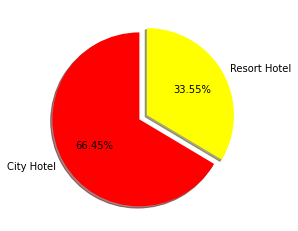

In [ ]:
labels=list(df_hba["hotel"].value_counts().index)
sizes=list(df_hba["hotel"].value_counts())
colors=["red","yellow"]
plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True, explode=(0.1,0), autopct="%1.2f%%")

In [ ]:
'''As we can see that the percentage of City hotel is more as compared to the Resort hotel.
So we can say that City Hotels are booked more in comparisons with Resort Hotel.'''